In [3]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn tensorflow transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached transformers-4.54.1-py3-none-any.whl.metadata (41 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd

# Load real and fake news datasets
real_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")

# Add labels
real_news["label"] = 1  # Real news
fake_news["label"] = 0  # Fake news

# Combine datasets
df = pd.concat([real_news, fake_news], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle data
print(df.head())

                                               title  \
0   What Donald Trump Did On The Golf Course Is P...   
1   Hypocrites: Republican National Convention Wi...   
2  Theresa Maybe? PM refuses to say how she'd vot...   
3  Iran nuclear deal must be changed for U.S. to ...   
4  Outlines of Trump foreign policy are largely u...   

                                                text       subject  \
0  We already know that Donald Trump hates exerci...          News   
1  As Republicans stand firm about doing nothing ...          News   
2  LONDON (Reuters) - British Prime Minister Ther...     worldnews   
3  WASHINGTON (Reuters) - U.S. Secretary of State...     worldnews   
4  WASHINGTON (Reuters) - U.S. President-elect Do...  politicsNews   

                  date  label  
0        June 29, 2017      0  
1        June 17, 2016      0  
2    October 11, 2017       1  
3  September 19, 2017       1  
4    November 9, 2016       1  


In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check class balance
df["label"].value_counts().plot(kind="bar", title="Class Distribution")

# WordCloud for Fake News
fake_text = " ".join(df[df["label"] == 0]["text"])
wordcloud = WordCloud(width=800, height=400).generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Common Words in Fake News")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [10]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special chars
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df["cleaned_text"] = df["text"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akint\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akint\AppData\Roaming\nltk_data...


In [ ]:
5. Feature Extraction
Convert text to numerical features using:

TF-IDF (Term Frequency-Inverse Document Frequency)

Word Embeddings (Word2Vec, GloVe, BERT)

Option 1: TF-IDF Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_text"]).toarray()
y = df["label"]

In [ ]:
Option 2: BERT Embeddings (Advanced)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

X_bert = get_bert_embeddings(df["text"].tolist())

In [ ]:
6. Model Training & Evaluation
Split Data into Train & Test Sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Train a Classifier (Logistic Regression)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9863028953229399
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4584
           1       0.98      0.99      0.99      4396

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
Confusion Matrix Visualization

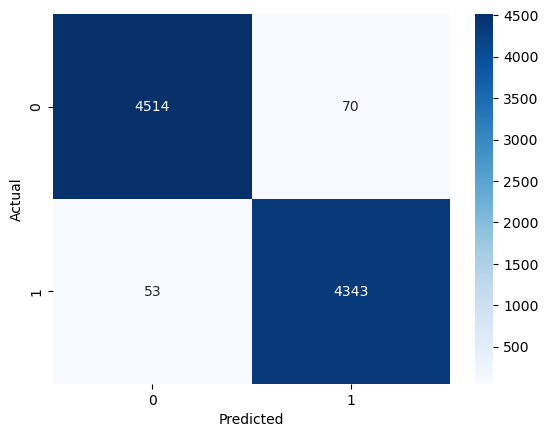

In [13]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
7. Advanced Approach: Deep Learning (LSTM/BERT)

In [ ]:
LSTM Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(64),
    Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=64)

ModuleNotFoundError: No module named 'tensorflow'

In [20]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


ModuleNotFoundError: No module named 'tensorflow'

In [22]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\packaging\requirements.py", line 36, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
      m

In [23]:
conda install -c conda-forge tensorflow

error: bad escape \P at position 28

In [ ]:
Fine-Tuning BERT (Hugging Face Transformers)



In [24]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(output_dir="./results", num_train_epochs=3, per_device_train_batch_size=8)
trainer = Trainer(model=model, args=training_args, train_dataset=X_train, eval_dataset=X_test)
trainer.train()

ModuleNotFoundError: No module named 'transformers'

In [25]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [26]:
import sys
sys.path.append(r"C:\Users\akint\AppData\Roaming\Python\Python312\site-packages")

In [27]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments


In [28]:
import sys
!{sys.executable} -m pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [29]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(output_dir="./results", num_train_epochs=3, per_device_train_batch_size=8)
trainer = Trainer(model=model, args=training_args, train_dataset=X_train, eval_dataset=X_test)
trainer.train()

ImportError: 
BertForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFBertForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


In [30]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB ? eta -:--:--
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------- --------- 160.4/216.1 MB 418.5 kB/s eta 0:02:13
   ---------------------------- --------- 160.7/216.1 MB 419.6 kB/s eta 0:02:12
   ---------------------------- --------- 160.7/216.1 MB 419.6 kB/s eta 0:02:12
   ---------------------------- --------- 161.0/216.1 MB 423.8 kB/s eta 0:02:10
   ---------------------------- --------- 161.2/216.1 MB 428.4 kB/s eta 0:02:08
   ---------------------------- --------- 161.5/216.1 MB 434.5 kB/s eta 0:02:06
   ---------------------------- --------- 161.5/216.1 MB 434.5 kB/s eta 0:02:06
   ---------------------------- --------- 162.0/216.1 MB 449.3 kB/s eta 0:02:01
   ---------------------------- --------- 162.3/216.1 MB 455.4 kB/s eta 0:01:59
   ---------------------------- --------- 162.3/216.1 MB 455.4 kB/s eta 0:01:59
   ---------------------------- --------- 162.5/216.1 MB 459.2 kB/s eta 0:01:57
   ---------------------------- --------- 163.1/216.1 MB 466.5 kB/s eta 0:01:54
   ---------------------------- -------

In [31]:
from transformers import TFBertForSequenceClassification

ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [1]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
training_args = TrainingArguments(output_dir="./results", num_train_epochs=3, per_device_train_batch_size=8)
trainer = Trainer(model=model, args=training_args, train_dataset=X_train, eval_dataset=X_test)
trainer.train()

ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [32]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: Save TF-IDF and Logistic Regression model
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_text"])
model = LogisticRegression().fit(X, df["label"])

joblib.dump(model, "fake_news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']